In [1]:
import torch  # Create tensors 
import torch.nn as nn  # Make the weights and bias tensors part of the neural network
import torch.nn.functional as F # activation functions 
from torch.optim import SGD # Stochastic gradient descent to see if the model fits the data

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# Simple introductory concepts about torch size 
cbd = torch.tensor([[[[3.34], [2]],[[3.3], [4]],[[4.2],[1.3]]],[[[3.34], [2]],[[3.3], [4]],[[4.2],[1.3]]]])
print(cbd.shape)   # torch.Size([3, 2, 1])

torch.Size([2, 3, 2, 1])


In [23]:
# Create a class that contains NN model
class BasicNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Build a model with weights and biases & this one is fixed weights fixed values 
        # if not, we may need to initialize all the variables beforehand 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # requires gradient d to optimize the weight
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
         
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)


        ## Why these parameters do not work out
#         self.w00 = nn.Parameter(torch.tensor(3.34), requires_grad=False) # requires gradient d to optimize the weight
#         self.b00 = nn.Parameter(torch.tensor(-1.43), requires_grad=False)
#         self.w01 = nn.Parameter(torch.tensor(-1.22), requires_grad=False)
         
#         self.w10 = nn.Parameter(torch.tensor(-3.53), requires_grad=False)
#         self.b10 = nn.Parameter(torch.tensor(0.57), requires_grad=False)
#         self.w11 = nn.Parameter(torch.tensor(-2.3), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(.0), requires_grad=True)
        
    # Initialize Forward function and this function takes a matrix as an input
    def forward(self, input):
        
        # Build the path for all nodes and weight for each path
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output
    


In [24]:
# to verify the above codes are correctly written
input_doses = torch.linspace(start=0, end=1, steps=11) # Create a tensor with a sequence of 11 values between and including 0 and 1

input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [25]:
model = BasicNN()

In [26]:
output_values = model(input_doses)

In [27]:
output_values

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)

In [28]:
sns.set(style="whitegrid")

Text(0.5, 0, 'Doses')

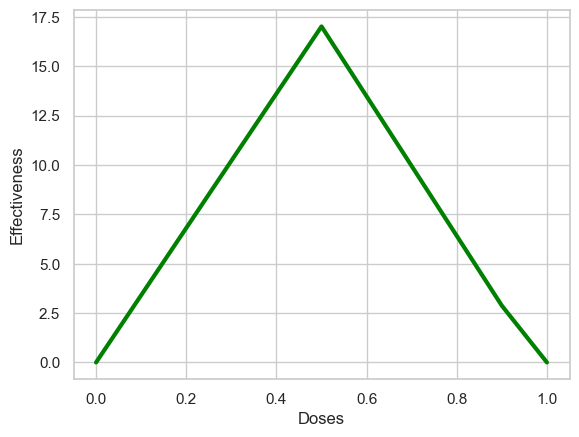

In [29]:
sns.lineplot(x=input_doses,
            y=output_values.detach(),
            color='green',
            linewidth=3)

plt.ylabel("Effectiveness")
plt.xlabel("Doses")

In [30]:
# As we have one left to calculate and we leave the last bias to be optimized to train itself
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [31]:
# Start creating an optimizer

# use Stochastic Gradient to optimize b_final
optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

# Using for loop to do Gradient Descent
# We run through three data points from inputs

for epoch in range(100):
    
    total_loss = 0
    
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration]
        label_i = labels[iteration]
        
        output_i = model(input_i)
        
        loss = (output_i - label_i) ** 2 
        
        loss.backward()
        
        total_loss += float(loss)
        
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
    
    optimizer.step()
    optimizer.zero_grad()
    
    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")

print("Final bias, after optimization: " + str(model.final_bias.data))

Final bias, before optimization: tensor(0.)

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Final Bias: tensor(-15.8919)

Step: 22 Final Bias: tensor(-15.9155)

Step: 23 Final Bias: tensor(-15.9344)

Step: 24 Final Bias: tensor(-15.9

In [32]:
# How to interpret the data? 
# Since self.final_bias = nn.Parameter(torch.tensor(.0), requires_grad=True) is set arbitrary, we need to let it float until the optimization point happens with the data at -16.0 
# so the output will be -16.0

ModuleNotFoundError: No module named 'torchvision'